In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

In [2]:
diabetes = load_diabetes()

In [3]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [7]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [8]:
df['target']  = diabetes.target

In [9]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [11]:
x = df.drop(columns=['target'])
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [12]:
y = df['target']

In [13]:
x_train , x_test , y_train,y_test = train_test_split(x,y , test_size=.2)

In [32]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [25]:
ridge_model = Ridge()
lasso_model = Lasso()

In [26]:
ridge_model.fit(x_train_scaled,y_train)

Ridge()

In [27]:
lasso_model.fit(x_train_scaled,y_train)

Lasso()

In [28]:
ridge_model.predict(x_test_scaled)

array([148.07831853, 181.65303039, 139.81224096, 108.23503725,
       238.60734913, 127.58716027, 212.16551751, 166.97746952,
       179.19968608, 101.45558375,  79.66846723,  54.77365835,
        69.30729564, 157.19207565, 112.73962918,  57.40361034,
        60.20310414, 141.35867372,  99.29315324, 146.76803463,
       211.77233209, 143.53303464, 199.20383724, 193.13442781,
       173.89206432, 183.55674002, 108.71073779, 217.93640669,
       158.59284864, 229.17181992, 117.12244775, 133.06972397,
       223.71015713, 119.27364655, 153.38173748, 142.56224723,
       210.54987846, 242.401287  , 188.55499934, 106.59005912,
       186.34606547, 233.07689062, 133.97437681, 184.91610364,
        62.96418089, 273.13690492, 176.6944359 , 157.64538842,
        68.7226074 , 144.44964879, 225.33513147,  71.32632931,
       178.766029  , 214.52650299, 147.19148731, 159.0276992 ,
        69.41542281,  88.52602639, 234.46822314, 118.57735139,
       119.56792337, 149.41940013, 242.33736847, 182.40

In [29]:
lasso_model.predict(x_test_scaled)

array([145.69955905, 176.17670432, 136.90248112, 111.25122294,
       235.59962952, 128.74461645, 206.00837805, 166.57102175,
       182.77780271, 100.94224837,  79.39204846,  56.48442448,
        71.73824489, 153.04208861, 116.89545686,  58.98519048,
        61.11408527, 141.91188129,  99.62881905, 146.28290392,
       202.26911232, 145.28321304, 196.10808132, 186.74547572,
       174.48876006, 186.2037868 , 109.96485824, 219.2071343 ,
       163.44533334, 227.70868847, 120.7431621 , 128.40001706,
       221.63195233, 121.41984249, 151.20094059, 144.66567849,
       212.45601482, 245.68911308, 185.21192863, 110.46117088,
       178.65193185, 232.30588593, 131.24337971, 194.26413788,
        63.09429535, 271.70155512, 177.40676323, 157.35143051,
        71.69278236, 142.13319162, 223.77529838,  74.45988327,
       176.85886549, 202.55238866, 145.96728435, 155.16792332,
        66.74788348,  88.7339508 , 230.22929501, 117.4333757 ,
       121.02724896, 149.00051332, 246.61613376, 181.76

In [30]:
mean_squared_error(y_test,ridge_model.predict(x_test_scaled))

3174.916378446022

In [31]:
mean_squared_error(y_test,lasso_model.predict(x_test_scaled))

3268.040299652246

In [ ]:
r2
adj r2
rmse

In [ ]:
lasso r2 score - 0.466 , ridge r2 score - 0.454

In [33]:
#polynomial regression

In [36]:
data = pd.read_csv('D:\downloads\ice_cream.csv')
data.columns

Index(['Temperature (°C)', 'Ice Cream Sales (units)'], dtype='object')

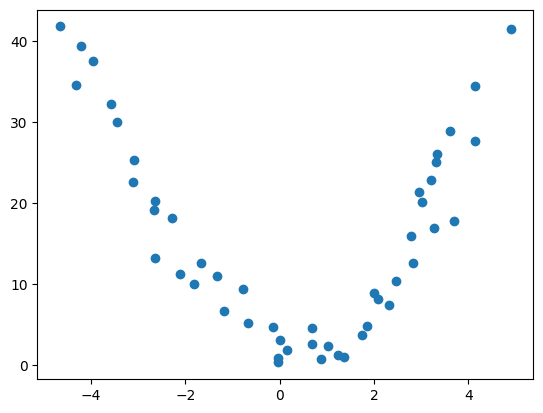

In [37]:
plt.scatter(data['Temperature (°C)'] , data['Ice Cream Sales (units)'])

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [60]:
x =data[['Temperature (°C)']].values
y= data['Ice Cream Sales (units)'].values
ploy_model = make_pipeline(PolynomialFeatures(degree=3) , LinearRegression())
ploy_model1 = make_pipeline(PolynomialFeatures(degree=4) , LinearRegression())
ploy_model2= make_pipeline(PolynomialFeatures(degree=5) , LinearRegression())
ploy_model3 = make_pipeline(PolynomialFeatures(degree=16) , LinearRegression())
ploy_model4 = make_pipeline(PolynomialFeatures(degree=13) , LinearRegression())
ploy_model.fit(x,y)
ploy_model1.fit(x,y)
ploy_model2.fit(x,y)
ploy_model3.fit(x,y)
ploy_model4.fit(x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=13)),
                ('linearregression', LinearRegression())])

In [61]:
y_pred = ploy_model.predict(x)

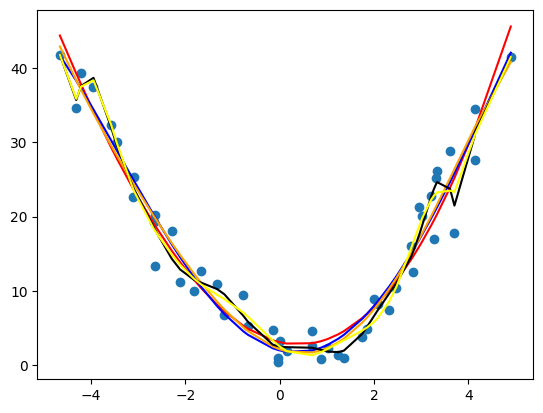

In [62]:
plt.scatter(data['Temperature (°C)'] , data['Ice Cream Sales (units)'])
plt.plot(x,ploy_model.predict(x),color = 'red' )
plt.plot(x,ploy_model1.predict(x),color = 'blue' )
plt.plot(x,ploy_model2.predict(x),color = 'orange' )
plt.plot(x,ploy_model3.predict(x),color = 'black' )
plt.plot(x,ploy_model4.predict(x),color = 'yellow' )

In [63]:
from sklearn.metrics import mean_squared_error,r2_score

In [64]:
r2_score(x,ploy_model.predict(x))

-55.23830345162699

In [65]:
r2_score(x,ploy_model1.predict(x))

-55.385971006805946

In [66]:
r2_score(x,ploy_model2.predict(x))

-55.41569243145608

In [67]:
r2_score(x,ploy_model3.predict(x))

-55.82923091436496

In [68]:
r2_score(x,ploy_model4.predict(x))

-55.75423012643791

In [69]:
mean_squared_error(x,ploy_model.predict(x))

400.91796378855406

In [70]:
mean_squared_error(x,ploy_model1.predict(x))

401.97067291927857

In [71]:
mean_squared_error(x,ploy_model2.predict(x))

402.18255436520224

In [72]:
mean_squared_error(x,ploy_model3.predict(x))

405.1306341674076

In [73]:
mean_squared_error(x,ploy_model4.predict(x))

404.595960087061

In [ ]:
homework - convert this ridge and lasso application into streamlit application and deploy it in streamlit cloud , connect with data based  mongo db as well

same you have to perform for ploynomial regression as well 
send us a final link in our whatsapp group by 2 PM IST today itself 